In [2]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.linear_model import LinearRegression

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from clean import PCBCCleaner, DrawPointAssayCleaner, DrawPointCoordCleaner

# import plotter

output_dir = "../outputs/grade_analysis_compare_dp_pcbc/"
SAVE = False

plt.rcParams.update(
    {
        'font.size': 18
    }
)

# Data Input and Cleaning

In [3]:
pcbc_df = PCBCCleaner.get_processed_data()
assay_df = DrawPointAssayCleaner.get_processed_data()
dp_coords = DrawPointCoordCleaner.get_processed_data()

# Grouping

## PCBC

In [4]:
pcbc_dhids = list(pcbc_df['dhid'].unique())

pcbc_groups = {}

for dhid in pcbc_dhids:
    filtered_pcbc_df = pcbc_df.query('dhid == @dhid')
    pcbc_groups[dhid] = {}
    try:
        pcbc_groups[dhid] = (
            filtered_pcbc_df['weight'],
            filtered_pcbc_df['CU'],
            filtered_pcbc_df['AU']
        )
    except:
        print(f'Invalid data for {dhid}')

## DP Assay

In [5]:
assay_dhids = list(assay_df['dhid'].unique())

assay_groups = {}

for dhid in assay_dhids:
    filtered_assay_df = assay_df.query('dhid == @dhid')
    assay_groups[dhid] = {}
    try:
        assay_groups[dhid] = (
            filtered_assay_df['weight'],
            filtered_assay_df['CU'],
            filtered_assay_df['AU']
        )
    except:
        print(f'Invalid data for {dhid}')

# Output

In [6]:
def plot_au_vs_cu(ax, w, x, y, dhid=None, min_s=2, max_s=298, alpha=1):
    min_w = min(w)
    max_w = max(w)
    cmap = plt.colormaps.get('copper')
    norm = colors.Normalize(vmin=min_w, vmax=max_w)

    s = (min_s + max_s * norm(w))

    # create linear regression model
    model = LinearRegression()

    # define predictor and response variables
    X = np.array(x)
    X = X.reshape(-1, 1)

    # fit regression model
    model.fit(X, y, w)
    r_squared = model.score(X, y, w)
    m, b = model.coef_[0], model.intercept_
    # print(r_squared, m, b)

    # Graph
    ax.scatter(x, y, c=cmap(norm(w)), s=s, alpha=alpha)
    ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}', alpha=alpha)

    ax.set_xlim(0)
    ax.set_ylim(0)

    ax.set_title(f'{dhid}_AU_vs_CU_R2={r_squared:.2f}')
    ax.set_xlabel('CU grade (%)')
    ax.set_ylabel('AU grade (ppm)') 
    
    ax.legend()
    
    return r_squared     

/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: Un

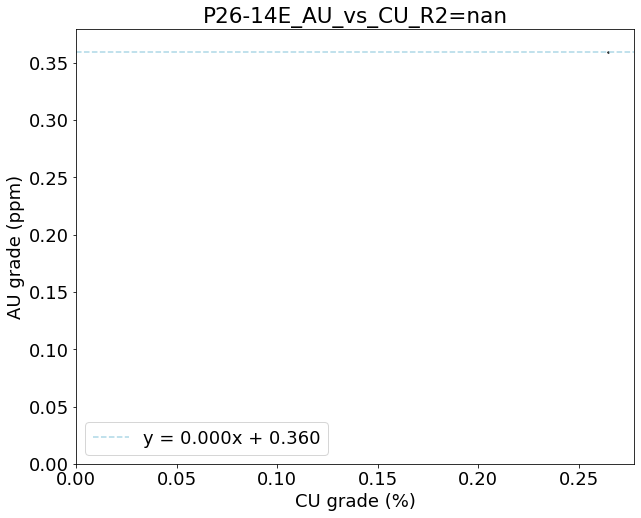

In [7]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

# Iterate over each drillhole
for dhid in pcbc_dhids:
    w, x, y = pcbc_groups[dhid]
    
    ax.cla()
    r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid)
    
    if SAVE:
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'{dhid}_PCBC_R2={r2:.2f}.svg', format='svg')


# TODO: do not perform linear regression on drawpoints with fewer than 3 values
# TODO: compare PCBC and Assay linear regressions

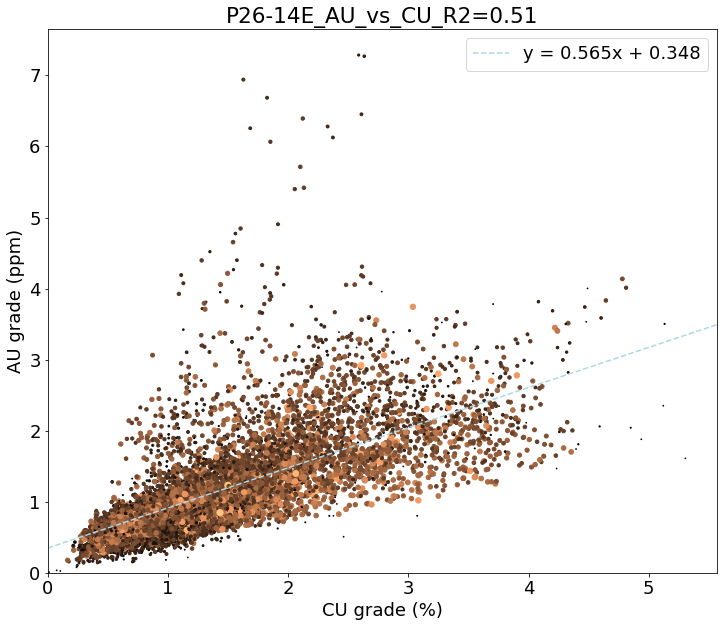

In [8]:
# Perform the same code but for the master dataset

fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot()

w, x, y = pcbc_df['weight'], pcbc_df['CU'], pcbc_df['AU']

ax.cla()
r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid, min_s=0.5, max_s=38)

if SAVE:
    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_PCBC_R2={r2:.2f}.svg', format='svg')

## DP Assays

/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


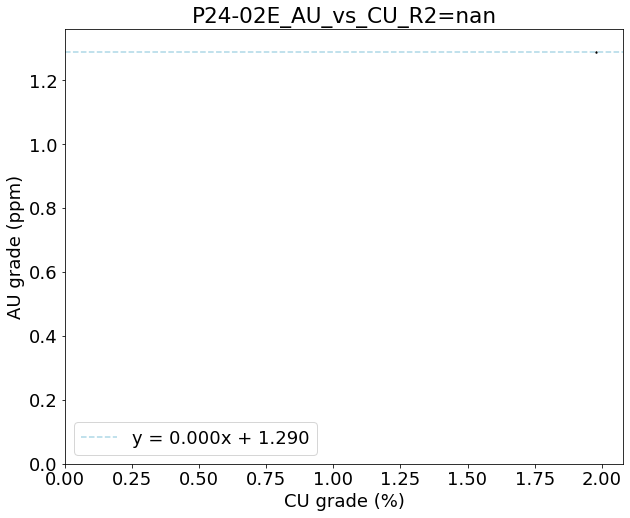

In [9]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

for dhid in assay_dhids:
    w, x, y = assay_groups[dhid]
    
    ax.cla()
    r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid)
    
    if SAVE:
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'{dhid}_DP_R2={r2:.2f}.svg', format='svg')

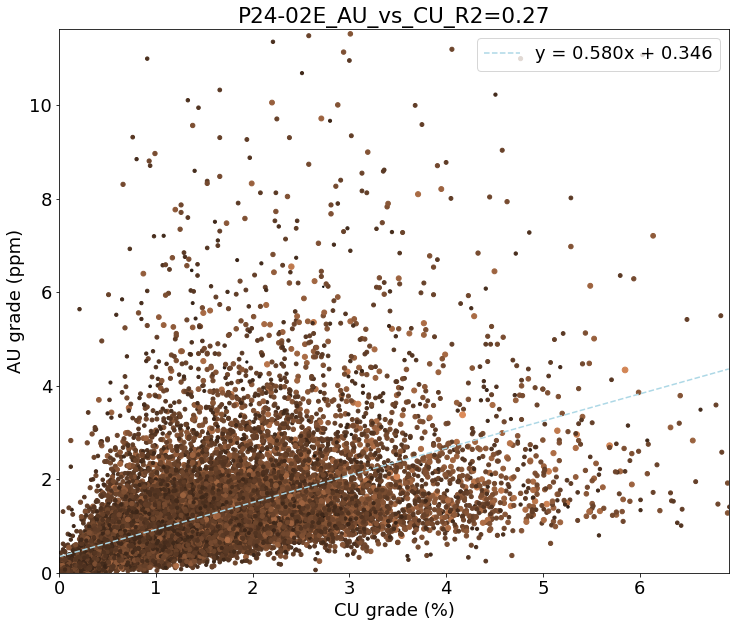

In [10]:
# Perform the same code but for the master dataset

fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot()

w, x, y = assay_df['weight'], assay_df['CU'], assay_df['AU']

ax.cla()
r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid, min_s=0.2, max_s=48)

# ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)

ax.set_xlim(0, np.percentile(x, 99.9))
ax.set_ylim(0, np.percentile(y, 99.9))

# ax.set_xlim(2**-2, 2**4)
# ax.set_ylim(2**-2, 2**4)

if SAVE:
    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_DP_R2={r2:.2f}.svg', format='svg')